In [1]:
from Helper.Load.classification import Classification
from Helper.Visual.Train.classification import VClassification
from Helper.Transform.Transform.classification import Classificaton_Transform
from Helper.Train.Train import Train

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import numpy as np
import pandas as pd

In [2]:
loadC = Classification("Data", "letter.dat", "letters-name.txt")

from Data.columns import Column_
transformC = Classificaton_Transform(loadC, Column_, LinearDiscriminantAnalysis)

from Data.hyperparameters import hyperparameters
trainC = Train(loadC, GaussianNB, transformC, hyperparameters)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [3]:
trainC.pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'inputs', 'global', 'estimator', 'inputs__memory', 'inputs__steps', 'inputs__inputs', 'inputs__inputs__n_jobs', 'inputs__inputs__transformer_list', 'inputs__inputs__transformer_weights', 'inputs__inputs__inputs_c', 'inputs__inputs__inputs_c__memory', 'inputs__inputs__inputs_c__steps', 'inputs__inputs__inputs_c__ColumnSelector', 'inputs__inputs__inputs_c__StandardScaler', 'inputs__inputs__inputs_c__ColumnSelector__columns', 'inputs__inputs__inputs_c__StandardScaler__copy', 'inputs__inputs__inputs_c__StandardScaler__with_mean', 'inputs__inputs__inputs_c__StandardScaler__with_std', 'global__memory', 'global__steps', 'global__globals', 'global__globals__n_components', 'global__globals__priors', 'global__globals__shrinkage', 'global__globals__solver', 'global__globals__store_covariance', 'global__globals__tol', 'estimator__priors', 'estimator__var_smoothing'])

In [4]:
clf = trainC.fit_GSCV()

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.parti

In [5]:
preds = clf.predict(loadC.partition.X_test)
np.mean(preds == loadC.partition.y_test.values.ravel())

/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.7163636363636363

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
classification_report(loadC.partition.y_test.values, preds).split('\n')

['              precision    recall  f1-score   support',
 '',
 '           A       0.81      0.89      0.85       260',
 '           B       0.64      0.77      0.70       253',
 '           C       0.78      0.77      0.77       243',
 '           D       0.67      0.78      0.72       266',
 '           E       0.66      0.56      0.60       254',
 '           F       0.70      0.71      0.70       256',
 '           G       0.54      0.54      0.54       255',
 '           H       0.47      0.38      0.42       242',
 '           I       0.89      0.84      0.86       249',
 '           J       0.86      0.72      0.79       247',
 '           K       0.60      0.61      0.61       244',
 '           L       0.95      0.76      0.85       251',
 '           M       0.82      0.88      0.85       261',
 '           N       0.88      0.83      0.86       258',
 '           O       0.61      0.70      0.65       249',
 '           P       0.86      0.76      0.81       265',
 '       

/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


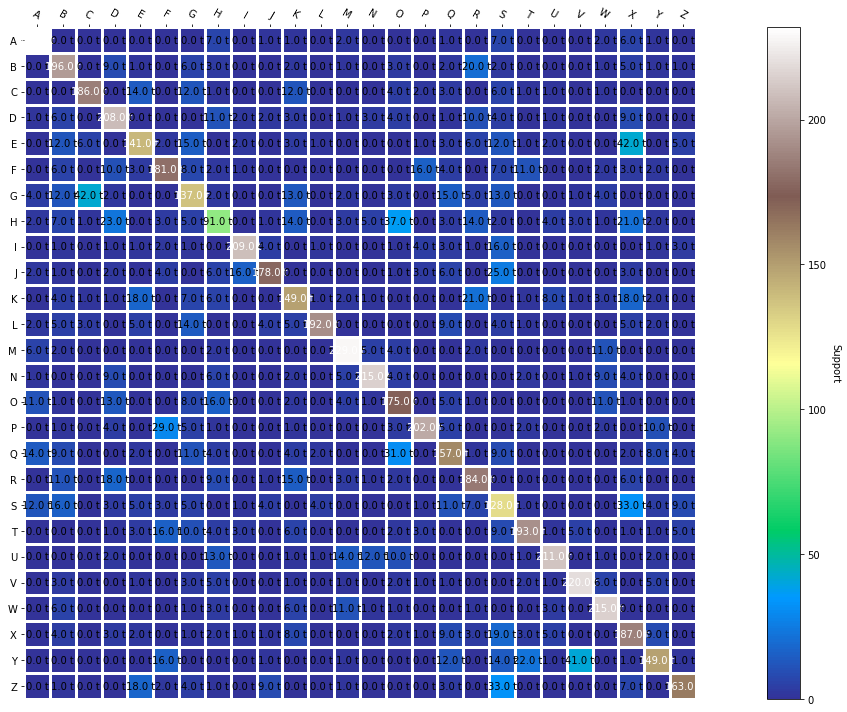

In [7]:
VClassification(trainC).construct_confuation_matrix()